In [80]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  7 18:49:01 2022

@author: Sunanda Das
"""

import cv2
  


def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 

   
img = cv2.imread('./th_img2.jpg', 0)
cv2.imshow('image', img)   
cv2.setMouseCallback('image', click_event)  
cv2.waitKey(0) 
cv2.destroyAllWindows()

225   123
91   254
47   380
201   395


In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

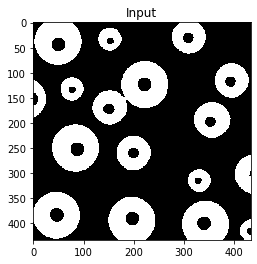

In [81]:
A = cv2.imread('./th_img2.jpg', 0)
A = np.round(A / 255.0)
A = np.uint8(A)

plt.imshow(A, 'gray')
plt.title('Input')
plt.show()

In [82]:
B = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

In [83]:
X = []

X.append(np.zeros(A.shape, np.uint8))

X[0][123, 225] = 1
X[0][254, 91] = 1
X[0][380, 47] = 1
X[0][395, 201] = 1

In [84]:
k = 1
while True:
    X.append(cv2.dilate(X[k-1], B, iterations=1) & (1-A))
    
    if np.sum(X[k-1] != X[k]) == 0:
        break
    
    k += 1

In [88]:
X[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

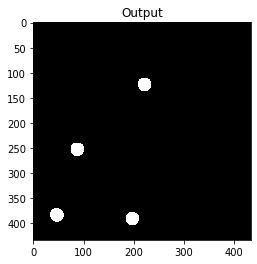

In [86]:
plt.imshow(X[-1], 'gray')
plt.title('Output')
plt.show()

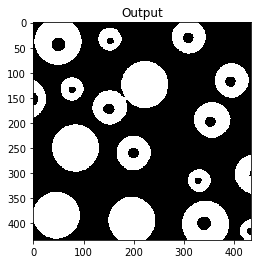

In [85]:
result = X[-1] | A

plt.imshow(result, 'gray')
plt.title('Output')
plt.show()